In [5]:
import torch 
from rbi.utils.autograd_tools import batch_jacobian 

import matplotlib.pyplot as plt

In [6]:
A = torch.tensor([[ 1.5672, -0.3508],
        [-0.3508,  0.0885]])

In [7]:
def f(x):
    return torch.einsum("kj, ij, ki -> k",x, A, x) + 5*torch.sin(2*x[:, 0]) + 5*torch.cos(2*x[:,1])

(-0.5, 199.5, 199.5, -0.5)

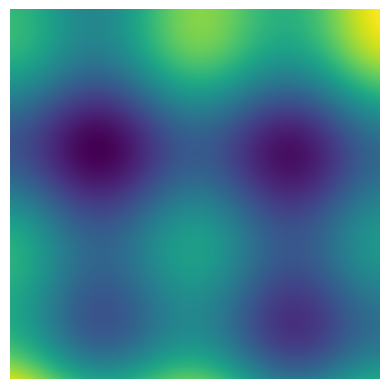

In [8]:
x = torch.linspace(-3, 3, 200)
y = torch.linspace(-3, 3, 200)
XX,YY = torch.meshgrid(x,y)
pos = torch.hstack([XX.reshape(-1,1), YY.reshape(-1,1)])
z = f(pos)

plt.imshow(z.reshape(200, 200))
plt.axis("off")

In [11]:
point = torch.randn((1,2))
point

tensor([[-0.5369, -0.0245]])

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(XX, YY, z.reshape(200,200), alpha=0.8)
_ = ax.plot(point[:,0],point[:,1], f(point).squeeze()+10, "x", color="red")

C:\Users\manug\AppData\Roaming\Python\Python39\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

<Figure size 640x480 with 1 Axes>

In [12]:
Js = batch_jacobian(lambda x: f(x).unsqueeze(0), point)

In [13]:
def sample_directional_derivaitives(Js):
    w = torch.randn((10000, 2))
    v = w/torch.linalg.norm(w, dim=-1, keepdim=True)
    dir = (Js@v.T).T
    return dir

(array([2009.,  964.,  705.,  619.,  682.,  638.,  624.,  779.,  926.,
        2054.]),
 array([-3.2200017e+00, -2.5760014e+00, -1.9320011e+00, -1.2880008e+00,
        -6.4400053e-01, -2.3841858e-07,  6.4400005e-01,  1.2880003e+00,
         1.9320006e+00,  2.5760009e+00,  3.2200012e+00], dtype=float32),
 <BarContainer object of 10 artists>)

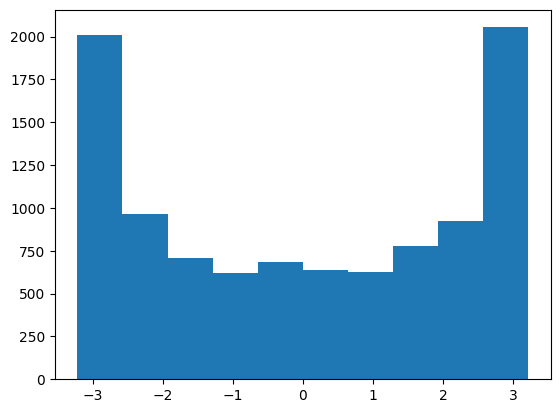

In [14]:
samples = sample_directional_derivaitives(Js[0])
plt.hist(samples.numpy())

In [15]:
samples.var()

tensor(5.1913)

In [16]:
1/2*Js[0]@Js[0].T

tensor([[5.1842]])

In [78]:
A= torch.randn(5,5)
A = A@A.T + torch.eye(5) * 0.1
p = torch.distributions.MultivariateNormal(torch.zeros(5), A)

In [79]:
samples = p.sample((1000000,))

v = samples/torch.linalg.norm(samples, keepdim=True, dim=-1)

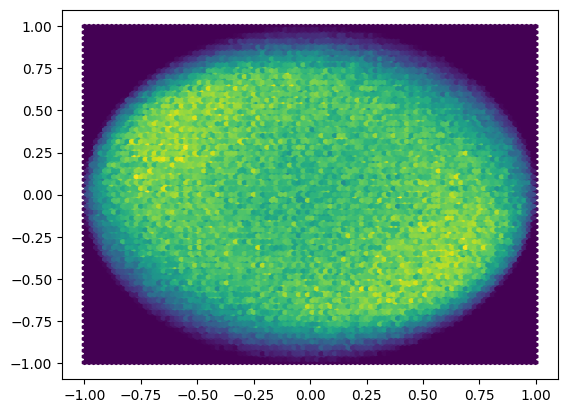

In [80]:
plt.hexbin(v[:,0], v[:,1], bins=2000)

In [81]:
def quadratic_norm(x, A):
    return torch.einsum("kj, ij, ki -> k",x, torch.linalg.inv(A), x).unsqueeze(0).T.sqrt()

In [82]:
v = samples/quadratic_norm(samples, A)

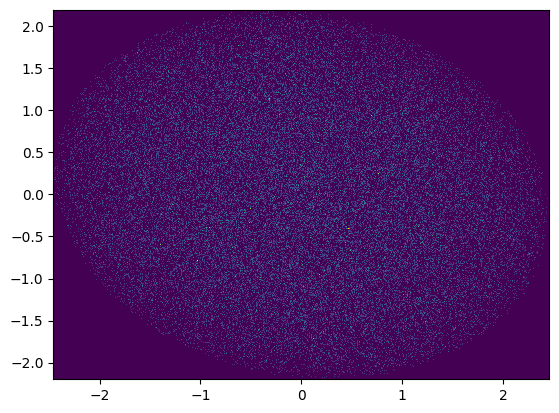

In [83]:
_ = plt.hist2d(v[:,0].numpy(), v[:,1].numpy(), bins=2000)

In [156]:
torch.cov(v.T) 

tensor([[ 1.2098, -0.1234,  0.2078,  0.4504, -0.0768],
        [-0.1234,  0.9668, -0.4668,  0.2208,  0.1851],
        [ 0.2078, -0.4668,  0.4931,  0.0956, -0.0555],
        [ 0.4504,  0.2208,  0.0956,  0.9948, -0.2582],
        [-0.0768,  0.1851, -0.0555, -0.2582,  1.4120]])

In [157]:
A/5

tensor([[ 1.2103, -0.1234,  0.2094,  0.4523, -0.0770],
        [-0.1234,  0.9679, -0.4668,  0.2205,  0.1854],
        [ 0.2094, -0.4668,  0.4933,  0.0965, -0.0560],
        [ 0.4523,  0.2205,  0.0965,  0.9957, -0.2567],
        [-0.0770,  0.1854, -0.0560, -0.2567,  1.4089]])

In [267]:
x = torch.normal(0, 1, (1000000,5))

covs = x[..., None]@x[..., None, :]
norms = (1/torch.sum(x**2, dim=-1, keepdim=True)).unsqueeze(-1)

In [289]:
torch.mean(norms**0.5)

tensor(0.5317)

In [253]:
full_vals.mean(dim=0).round(decimals=3)

tensor([[0.2000, 0.0000, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.2000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0000, 0.2000, -0.0000, -0.0000],
        [0.0000, -0.0000, -0.0000, 0.2000, -0.0000],
        [-0.0000, 0.0000, -0.0000, -0.0000, 0.2000]])

In [283]:
(torch.mean(norms) * torch.eye(5)).round(decimals=3)

tensor([[2.6810, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 2.6810, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 2.6810, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 2.6810, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 2.6810]])

In [271]:
full_vals = covs * norms

In [269]:
torch.mean(full_vals, dim=0).round(decimals=3)

tensor([[0.2000, -0.0000, 0.0000, 0.0000, -0.0000],
        [-0.0000, 0.2000, 0.0000, -0.0000, -0.0000],
        [0.0000, 0.0000, 0.2000, 0.0000, -0.0000],
        [0.0000, -0.0000, 0.0000, 0.2000, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, 0.2000]])